In [9]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import birdsonganalysis as bsa
from copy import deepcopy
from os.path import join
import json
import pandas as pd
import pickle
from syllable_cluster import extract_syllables_feature, percentage_change, all_syllables_features

import sys

sys.path.append('../model')

from song_model import SongModel

sns.set_palette('colorblind')
%matplotlib inline

In [10]:
path = '../model/res/super_concurrent_170413_113450/10_conc+slow_dev+default_coef+big_ba+20_replay+on_alpha_on_beta/'
with open(join(path, 'data_cur.pkl'), 'rb') as f:
    data = pickle.load(f)

In [11]:
root_data = [item[1] for item in data if item[0] == 'root']
rd = pd.DataFrame(root_data)
len(rd)

25

In [12]:
sm = rd.iloc[-1]['songs'][0]

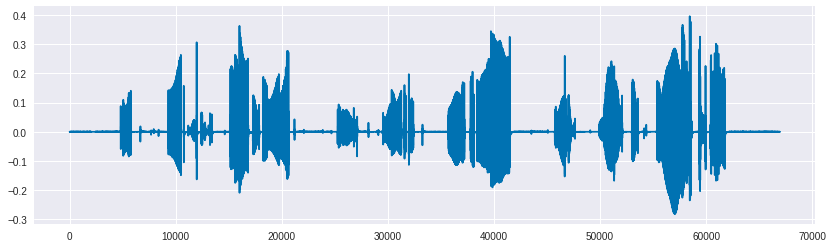

In [13]:
plt.figure(figsize=(14, 4))
plt.plot(sm.gen_sound())
plt.show()

In [14]:
from IPython.display import Audio

Audio(sm.gen_sound(), rate=44100)

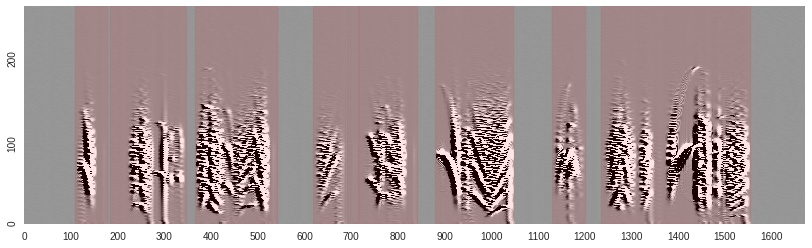

In [15]:
syllables_data = extract_syllables_feature(sm.gen_sound())
fig = plt.figure(figsize=(14, 4))
ax = fig.gca()
ax = bsa.spectral_derivs_plot(bsa.spectral_derivs(sm.gen_sound(), freq_range=256, fft_step=40, fft_size=1024), contrast=0.01, ax=ax)
for syllable in syllables_data:
    ax.axvspan(syllable['beg'], syllable['end'], color='r', alpha=0.1)

In [16]:
all_dat = all_syllables_features(rd)

In [39]:
first_day = 2
last_day = first_day  + 10
plot_dat = all_dat[((all_dat.day == first_day) & (all_dat.moment == 'evening'))
                   | ((all_dat['day'] == last_day) & (all_dat['moment'] == 'morning'))]

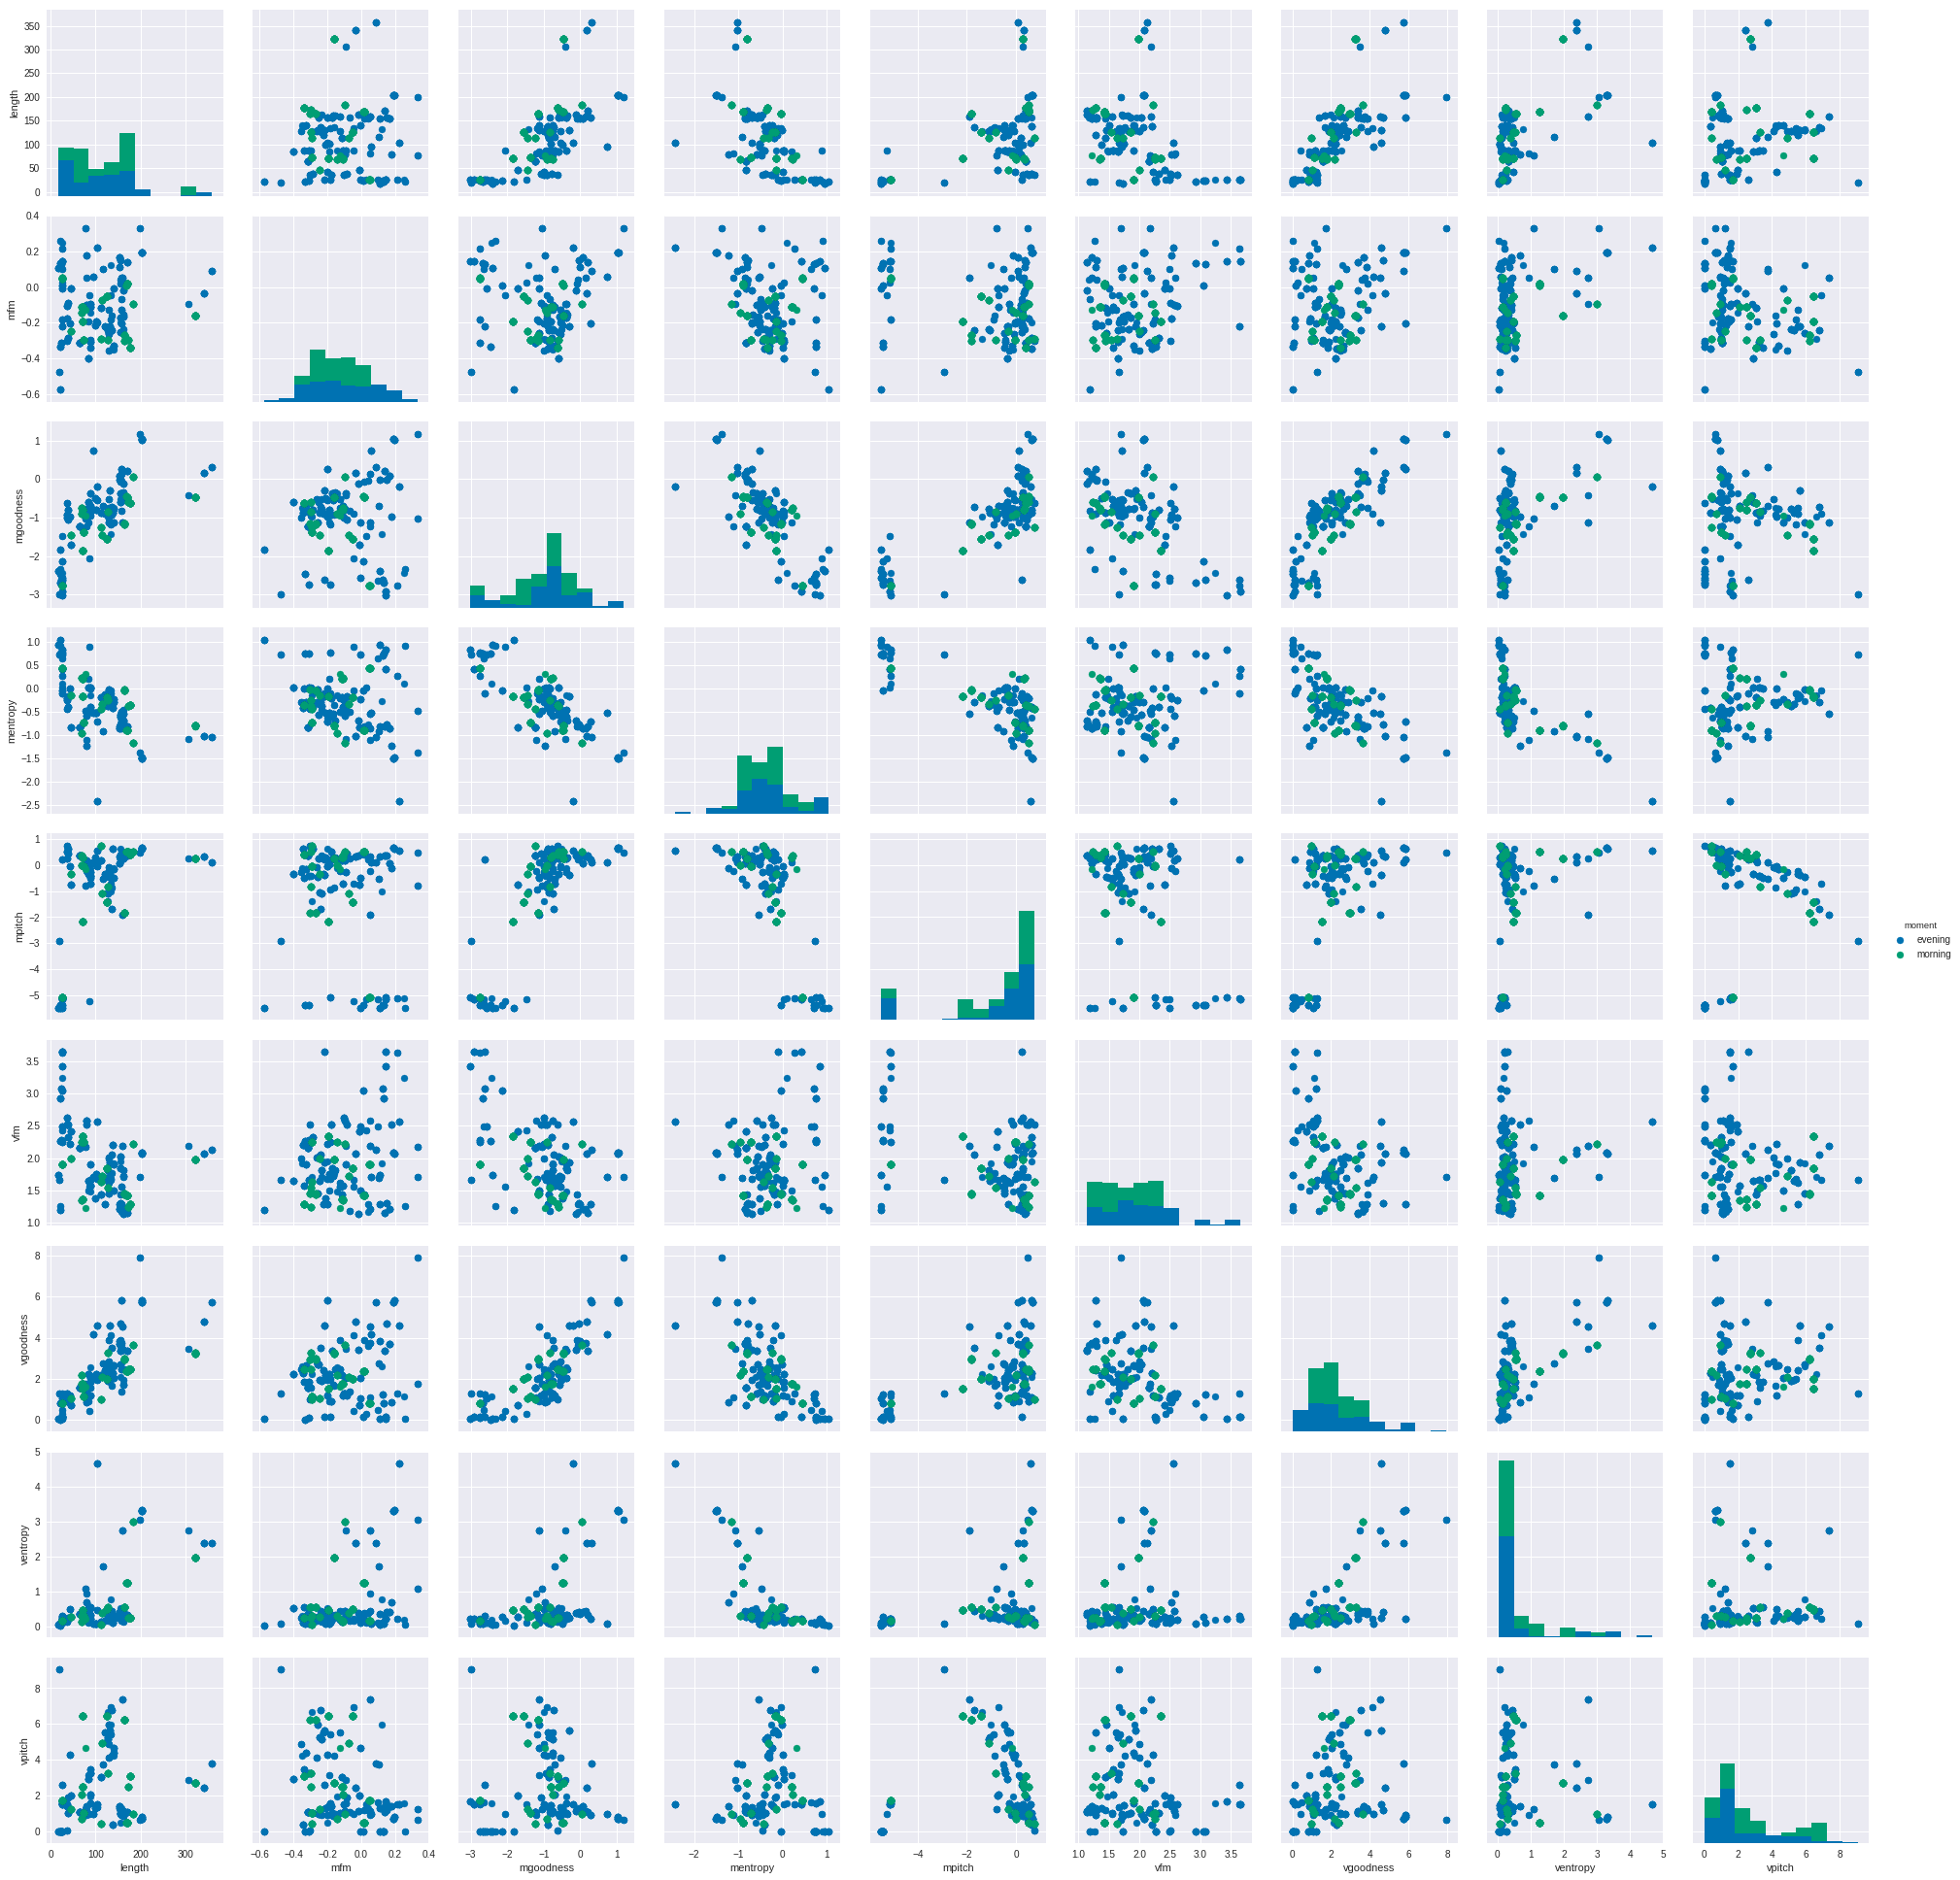

In [41]:
g = sns.PairGrid(plot_dat, hue="moment", vars=['length', 'mfm', 'mgoodness', 'mentropy', 'mpitch',
                                            'vfm', 'vgoodness', 'ventropy', 'vpitch'], size=3)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

In [ ]:
percentage_change(mid_dat, last_dat)

In [19]:
all_dat

,beg,day,end,length,mam,mamplitude,mentropy,mfm,mgoodness,moment,mpitch,vam,vamplitude,ventropy,vfm,vgoodness,vpitch
0,43,0,69,26,-0.000114,-3.999247,0.665341,-0.095597,-2.926845,morning,-5.157835,0.000097,0.201331,0.153336,3.072917,0.308614,1.471503e+00
1,99,0,182,83,-0.000187,0.415377,-3.174047,-1.397054,0.326100,morning,-1.620254,5.259470,1.061947,4.646741,2.081168,2.258331,5.716424e-01
2,226,0,293,67,-0.000248,-0.415371,-0.556553,0.235097,-0.871306,morning,-0.362765,0.896521,0.892284,0.164038,2.164097,1.769864,2.223685e+00
3,357,0,543,186,-0.000201,0.129366,-1.824267,-0.489928,0.497783,morning,-0.312116,2.009938,0.793874,4.166510,2.090893,6.312661,1.674452e+00
4,601,0,831,230,-0.000385,0.540091,-2.057579,-0.093741,-0.221542,morning,-0.562312,9.109434,1.387720,3.560781,2.153552,3.122664,1.229195e+00
5,880,0,1044,164,-0.000006,0.270016,-0.857720,0.209083,-0.378896,morning,0.065100,5.054728,0.693480,0.368257,1.312740,5.045271,1.492188e+00
6,1047,0,1351,304,-0.000082,0.202771,-2.460963,-0.705276,0.465359,morning,-0.775326,2.199368,1.092189,4.023717,2.141742,2.381104,1.666072e+00
7,1382,0,1546,164,-0.000079,-0.294059,-0.587404,-0.106101,-0.612867,morning,0.184039,11.232467,1.134581,0.263440,1.881325,1.871725,1.400406e+00
8,1550,0,1574,24,-0.000124,-5.142705,0.657815,0.139575,-2.238386,morning,-5.400465,0.000002,0.080537,0.047805,2.081626,0.119695,1.327995e-07
9,43,0,69,26,-0.000114,-3.999247,0.665341,-0.095597,-2.926845,morning,-5.157835,0.000097,0.201331,0.153336,3.072917,0.308614,1.471503e+00


In [30]:
all_dat[((all_dat.day == 5) & (all_dat.moment == 'evening')) | all_dat[((all_dat['day'] == 5) & (all_dat['moment'] == 'evening')) | ((all_dat['day'] == 6) & (all_dat['moment'] == 'morning'))]]

,beg,day,end,length,mam,mamplitude,mentropy,mfm,mgoodness,moment,mpitch,vam,vamplitude,ventropy,vfm,vgoodness,vpitch
5526,111,5,348,237,-0.000101,-1.741129,-0.099166,-0.204345,-1.288936,evening,-1.577536,8.093645e-01,3.447608,0.341290,1.829502,1.734888,5.728197e+00
5527,366,5,543,177,-0.000092,-0.295565,-0.367748,-0.370133,-1.009603,evening,0.311703,4.437453e+00,2.244568,0.169577,1.593517,1.770128,2.648209e+00
5528,619,5,689,70,-0.000128,-1.577657,0.167725,-0.216909,-0.657053,evening,0.323439,2.365711e-02,0.824510,0.111755,1.828522,2.239202,2.315295e+00
5529,723,5,849,126,-0.000147,-1.298253,-0.431378,-0.177184,-0.844646,evening,-0.102108,1.678105e-01,1.576668,0.142409,1.817654,2.038786,6.308239e+00
5530,880,5,1035,155,-0.000058,0.261619,-0.963849,-0.119738,-0.661590,evening,0.422150,3.067276e+00,0.763018,1.073302,1.364724,2.107023,5.304368e-01
5531,1041,5,1074,33,0.000299,-1.668231,0.551443,0.040833,-2.411877,evening,-4.265623,6.010895e-01,2.204720,0.712959,2.730594,1.269952,4.236525e+00
5532,1131,5,1203,72,-0.000120,-0.533022,-0.895321,-0.362000,-1.182655,evening,-0.130461,4.363575e+00,2.378833,0.610337,2.332845,1.612219,1.088714e+00
5533,1235,5,1571,336,-0.000227,-0.408385,-1.076006,-0.182762,-0.130198,evening,0.288503,9.461989e+00,2.538653,2.350839,1.863095,4.157838,2.670574e+00
5534,111,5,348,237,-0.000101,-1.741129,-0.099166,-0.204345,-1.288936,evening,-1.577536,8.093645e-01,3.447608,0.341290,1.829502,1.734888,5.728197e+00
5535,366,5,543,177,-0.000092,-0.295565,-0.367748,-0.370133,-1.009603,evening,0.311703,4.437453e+00,2.244568,0.169577,1.593517,1.770128,2.648209e+00
